# Is the non existence of a triangle in a funnel plot good evidence of p-hacking?

In [59]:
import numpy as np
import pandas as pd 
from ipywidgets import widgets,interactive, interact, fixed
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib nbagg

In [99]:
def compare_rnd_means(n):
    x1 = np.random.randn(n)
    x2 = np.random.randn(n)
    x1_std = np.std(x1, ddof=1)
    x2_std = np.std(x2, ddof=1)
    delta_se = (x1_std**2/len(x1) + x2_std**2/len(x2))**0.5
    std_pooled = np.std(np.concatenate([x1,x2]), ddof = 1)
    x1_m = np.mean(x1)
    x2_m = np.mean(x2)
    delta = x1_m - x2_m
    cohen_d = (x1_m - x2_m)/std_pooled
    return n, cohen_d, delta_se   

In [100]:
compare_rnd_means(200)

(200, 0.071227445922231611, 0.098823483361688141)

In [101]:
samples = np.random.randint(2, 1000, 10000)

In [102]:
compare_rnd_means = np.vectorize(compare_rnd_means)

In [103]:
results = compare_rnd_means(samples)

In [104]:
funnel = pd.DataFrame()
funnel['n'] = results[0]
funnel['cohen_d'] = results[1]
funnel['se'] = results[2]
funnel.head()

,n,cohen_d,se
0,132,0.112157,0.125066
1,340,-0.080033,0.075005
2,145,-0.020737,0.121483
3,106,-0.067512,0.134747
4,450,0.006108,0.066151


<IPython.core.display.Javascript object>


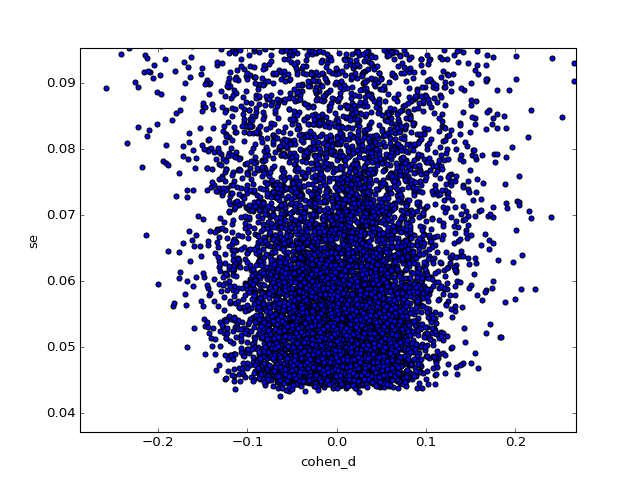

In [105]:
funnel.plot.scatter('cohen_d', 'se')

In [27]:
funnel['n'].apply(compare_rnd_means)

0           (0.24379417173, 0.977396969785)
1           (-0.132604755689, 1.0198092137)
2           (0.028522402787, 1.00986627477)
3        (-0.0558245543029, 0.957724989857)
4        (-0.00540646013554, 1.00790581421)
5        (0.00264696414617, 0.997371945774)
6          (-0.0316340877037, 0.9800580494)
7          (0.0329679607807, 1.02963819824)
8        (-0.0614554539673, 0.990091983106)
9           (0.144080459128, 1.01433200364)
10        (-0.554960924238, 0.995544735426)
11     (-0.000858637731687, 0.988106773755)
12       (-0.0703195304272, 0.956035509355)
13        (-0.0862044386074, 1.01478346187)
14       (-0.0735709386026, 0.979521080889)
15        (0.0607255023667, 0.984163505332)
16         (0.0114988165068, 1.03760861914)
17         (0.0408011808473, 0.99989957222)
18        (0.0420159834497, 0.902024890939)
19        (-0.0349983562971, 1.00654314506)
20        (0.0306400400327, 0.976989418766)
21        (0.0910913021407, 0.972446697895)
22         (-0.024464592125, 1.0